In [1]:
import numpy as np
from model import modelClass
import matplotlib.pyplot as plt

In [2]:
# given parameters -> [theta0, theta1, theta2] = [3, 1, 2]
# so, y = theta0 + theta1*x1 + theta2*x2 = 3 + x1 + 2*x2
# x1 -> should be a gaussian distribution of N(mean1, variance1) = N(3, 4)
# x2 -> should be a gaussian distribution of N(mean2, variance2) = N(-1, 4)
# so, y = theta0 + theta1*x1 + theta2*x2 = 3 + x1 + 2*x2 + gaussian noise = 3 + x1 + 2*x2 + N(0, 2)

# Finally spilt the data in 80% train- 20% split
num_points = int(1e6) 
params = {
    "theta0" : 3,
    "theta1" : 1,
    "theta2" : 2
}
gaussianDetails = {
    "x1" : {
        "mean": 3,
        "variance": 4
    },
    "x2": {
        "mean": -1,
        "variance": 4
    },
    "y_noice": {
        "mean": 0,
        "variance": 2
    }
}

In [3]:
# send data to the model to built it
# Question 1
model = modelClass(params, gaussianDetails, total_data_points = num_points, train_test_spit_ratio = 0.8)

Model for getting sampling data with gaussian noise
Shape of X : (3, 1000000)
Shape of Y : (1, 1000000)
Shuffling before spling the data
Training set X size :  (3, 800000)
Training set Y size :  (1, 800000)
Testing set X size :  (3, 200000)
Testing set Y size :  (1, 200000)


In [4]:
# Question 2
# implement stochastic GD method for optimizing J(theta)
# keep learning rate = 0.001 and initialize all params to 0
# choose r = [1, 80, 8000, 800000]

learning_rate = 0.001
threshold = 1e-4
maxEpocs = 100000
batchSizes = [1, 80, 8000, 800000]
windowSize = [5, 3, 1, 1]
thresholds = [1e-4, 1e-4, 1e-4, 1e-4]

# So over here, I am using the concept of moving average loss like for one epoc, the prev loss of size window is taken and their average is 
# compared with the loss value of the current epoch
# If the difference comes out to be less than a threshold,  then we can conclude that it converged
# So how this helps, since for stochastic GD for low batch size the loss value would be fluctuating around the local minima and won't
# directly converge, so taking the average of the last fluctuated window loss should give a reliable loss and we are taking their averge would 
# average out the noise
# But for higher batch size that really won't impact much so, I made window size 1 for larger batch size
# Here’s why it makes sense:
# Small batch (1) → super noisy updates, so you need a larger smoothing window (5) to avoid triggering convergence too early.
# Medium batch (80) → still noisy but less, so window 3 is okay.
# Large batch (8000 or 800000) → updates are already very stable, so you can just use 1 (effectively no smoothing).

params = {}

In [5]:
for idx, batchSize in enumerate(batchSizes):
    theta = model.initializeParams()
    theta, loss, epocs, timeTaken, thetaHistory = model.runBatchGradientDescent(
        theta, batch_size=batchSize, learning_rate=learning_rate, total_epocs=maxEpocs, tolerance=thresholds[idx], window = windowSize[idx])
    
    params[batchSize] = {
        "finalTheta" : theta,
        "loss" : loss,
        "epocs" : epocs,
        "timeTaken" : timeTaken,
        "thetaHistory" : thetaHistory
    }
    
    print(f"The algorithm converged for batch size : {batchSize} in time : {timeTaken} with {epocs} epocs")

Shape of theta :  (3, 1)
Running Batch Gradient Descent for batch_size: 1  and learning_rate: 0.001
Epoch 0, Loss: 1.0167711197385771
Theta : [[2.97557835]
 [0.97307365]
 [2.04989696]]
Execution time for prev epocs: 6.7463 seconds
Epoch 8, Loss: 1.0005459067198688
Theta : [[2.99283534]
 [1.01615254]
 [1.99172137]]
Execution time for prev epocs: 69.4907 seconds
Epoch 16, Loss: 1.0071510512950084
Theta : [[2.98560172]
 [0.96610714]
 [1.9973349 ]]
Execution time for prev epocs: 68.3985 seconds
Epoch 24, Loss: 1.0119438505000042
Theta : [[3.02724529]
 [0.95374535]
 [1.93690026]]
Execution time for prev epocs: 67.9778 seconds
Epoch 32, Loss: 1.0034173770667854
Theta : [[2.98134392]
 [0.97552435]
 [1.99378457]]
Execution time for prev epocs: 77.9721 seconds
Epoch 40, Loss: 1.0048966162065691
Theta : [[3.06728142]
 [1.0136572 ]
 [2.00032621]]
Execution time for prev epocs: 74.9878 seconds
Epoch 48, Loss: 1.0050987484791014
Theta : [[3.04223427]
 [0.95746101]
 [1.97664738]]
Execution time for 

In [6]:
# Epoch 54, Loss: 1.0005879913905664
# Theta : [[3.00739001]
#  [1.01478608]
#  [1.997326  ]]
# Execution time for prev epocs: 56.4550 seconds
# The algorithm converged for batch size : 1 in time : 497.93592858314514 with 54 epocs

# Epoch 9, Loss: 0.9986049216423775
# Theta : [[3.000617  ]
#  [1.00189555]
#  [2.00238268]]
# Execution time for prev epocs: 0.2753 seconds
# The algorithm converged for batch size : 80 in time : 2.744818925857544 with 9 epocs

# Epoch 118, Loss: 1.0002955409623973
# Theta : [[2.89115291]
#  [1.02358454]
#  [1.99219751]]
# Execution time for prev epocs: 1.1072 seconds
# The algorithm converged for batch size : 8000 in time : 21.23684334754944 with 118 epocs

# Epoch 3300, Loss: 1.1826018128781917
# Theta : [[1.86643126]
#  [1.24738994]
#  [1.91751074]]
# Execution time for prev epocs: 38.9616 seconds
# The algorithm converged for batch size : 800000 in time : 480.883917093277 with 3300 epocs

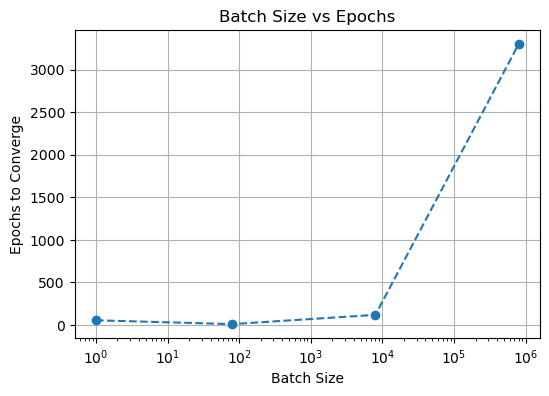

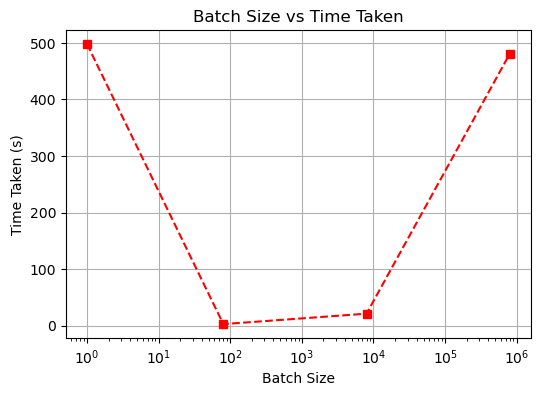

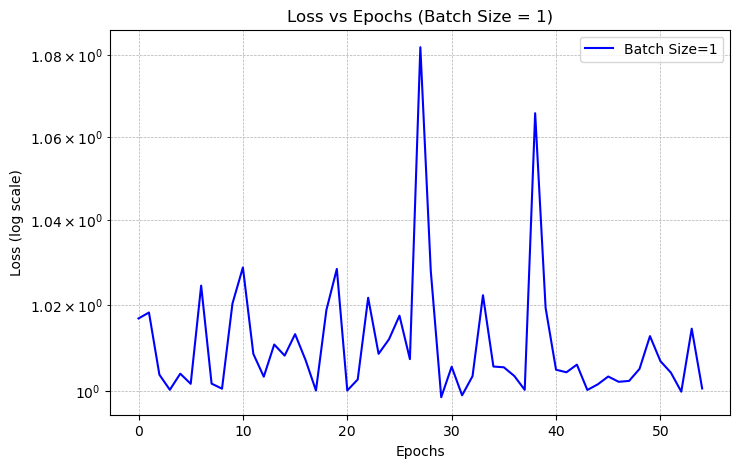

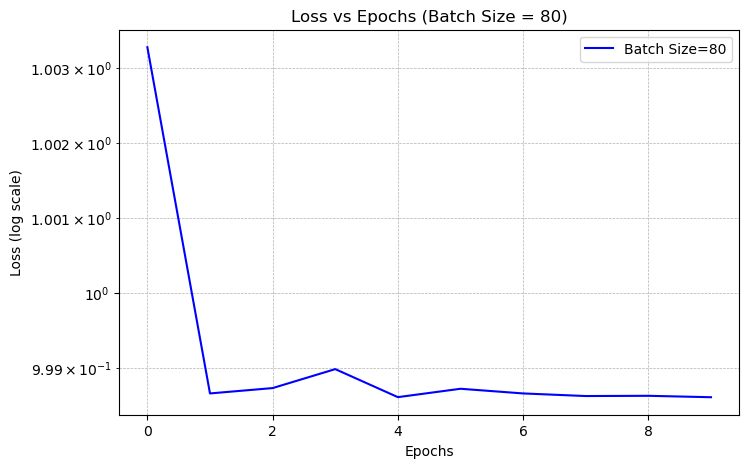

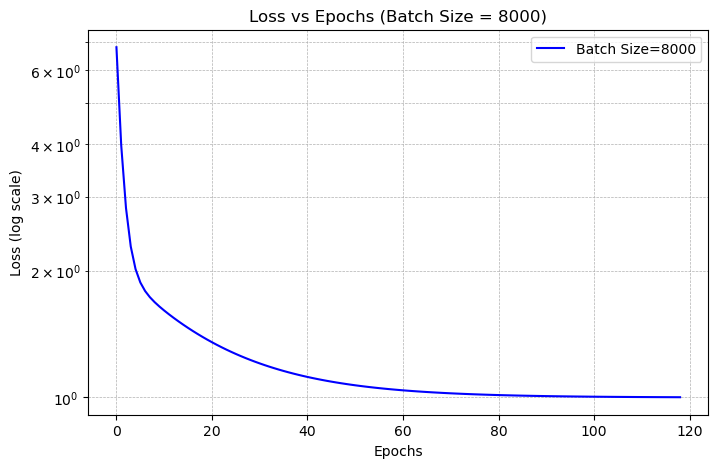

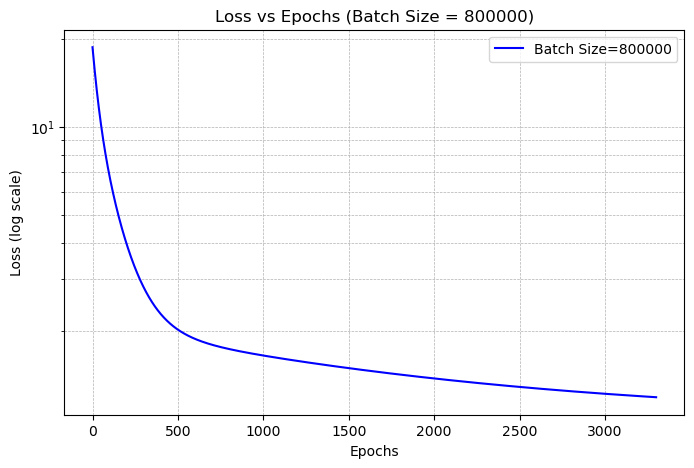

In [7]:
# Question 3A
# On varying the batch size in the above part,it can be seen that different algorithms converged to parameters that were somewhat close but not
# Batch size = 1 (SGD)
# Converged in 76 epochs, but time taken was huge (677s) because every epoch needs m gradient computations (one per sample).
# Theta is close to the true values, loss ~1.0.
# Shows fast convergence in epochs, but terrible wall-clock efficiency.

# Batch size = 80 (mini-batch GD)
# Only 7 epochs, and just 2.38s total.
# This is by far the best trade-off.
# Converges stably, and theta is extremely close to true values.

# Batch size = 8000 (large batch GD)
# Needed 118 epochs, 20.9s total.
# Converged reasonably well, but slower in epochs compared to batch=80.
# Still faster than SGD, but less efficient than mini-batch.

# Batch size = 800000 (full batch GD)
# Needed 3296 epochs, and 446s total .
# Thetas are way off compared to others, loss > 1.18 (didn’t converge as well).
# full batch GD moves too cautiously and struggles to escape plateaus.

# This is why in practice people use mini-batches (like 32, 64, 128).

# exact. Below is the graph that depicts the time taken, loss at which it converged and total epocs in each case

# Extract data from params
batch_sizes = list(params.keys())
epochs = [params[b]["epocs"] for b in batch_sizes]
times = [params[b]["timeTaken"] for b in batch_sizes]
final_losses = [params[b]["loss"][-1] for b in batch_sizes]

# 1. Batch size vs Epochs
plt.figure(figsize=(6,4))
plt.plot(batch_sizes, epochs, marker="o", linestyle="--")
plt.xscale("log")  # batch sizes grow huge, log scale is better
plt.xlabel("Batch Size")
plt.ylabel("Epochs to Converge")
plt.title("Batch Size vs Epochs")
plt.grid(True)
plt.show()

# 2. Batch size vs Time Taken
plt.figure(figsize=(6,4))
plt.plot(batch_sizes, times, marker="s", linestyle="--", color="r")
plt.xscale("log")
plt.xlabel("Batch Size")
plt.ylabel("Time Taken (s)")
plt.title("Batch Size vs Time Taken")
plt.grid(True)
plt.show()

# 3. Batch size vs Loss
# Plot loss curves for each batch size
# Create 4 separate plots
for batchSize, result in params.items():
    plt.figure(figsize=(8,5))
    plt.plot(range(len(result["loss"])), result["loss"], label=f"Batch Size={batchSize}", color="b")

    plt.xlabel("Epochs")
    plt.ylabel("Loss (log scale)")
    plt.yscale("log")
    plt.title(f"Loss vs Epochs (Batch Size = {batchSize})")
    plt.legend()
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()

In [10]:
# Question 3B
# Here we need to re-learn theta using the closed form solution
# theta = (X^T X)^-1 X^T Y

# In closed form solution we found that the parameters we learnt here are exactly the same from where the data is sampled
# explains the convex optimality of the loss function
train_x, train_y = model.train_data
print("train_x shape", train_x.shape)
print("train_y shape", train_y.shape)

train_x = train_x.T
train_y = train_y.T

print("After taking transpose")
print("train_x shape", train_x.shape)
print("train_y shape", train_y.shape)

XTX = np.dot( train_x.T, train_x)
XTX_INV = np.linalg.inv(XTX)
XTX_INV_XT = np.dot(XTX_INV, train_x.T)
theta_pred_closed_form = np.dot(XTX_INV_XT, train_y)

print("Theta in closed form : ", theta_pred_closed_form)

train_x shape (3, 800000)
train_y shape (1, 800000)
After taking transpose
train_x shape (800000, 3)
train_y shape (800000, 1)
Theta in closed form :  [[3.00089878]
 [0.9994806 ]
 [2.00023715]]


In [ ]:
# So we the sampled 80% random data, we got the predicted theta to be so close to actual true parameters [3, 1, 2]
# and far better than that we learned by SGD
# Comparison Table
# | Method / Batch Size     | θ₀ (Intercept) | θ₁     | θ₂     | Epochs | Final Loss | Time Taken (s) |
# | ----------------------- | -------------- | ------ | ------ | ------ | ---------- | -------------- |
# | **True Parameters**     | 3.0000         | 1.0000 | 2.0000 | –      | –          | –              |
# | **Closed Form**         | 3.0009         | 0.9995 | 2.0002 | –      | –          | –              |
# | **SGD (Batch = 1)**     | 3.0074         | 1.0148 | 1.9973 | 54     | 1.0006     | 497.94         |
# | **Mini-batch (80)**     | 3.0006         | 1.0019 | 2.0024 | 9      | 0.9986     | 2.74           |
# | **Mini-batch (8000)**   | 2.8912         | 1.0236 | 1.9922 | 118    | 1.0003     | 21.24          |
# | **Full Batch (800000)** | 1.8664         | 1.2474 | 1.9175 | 3300   | 1.1826     | 480.88         |


In [28]:
# Question 4
# Here all we need to do is get the predicted value of the test data and find the loss 
# and compare it witht the training loss
# for all the batch sizes and the closed form solution
x_test, y_test = model.test_data
test_data_size = model.total_data_points - model.train_size

x_train, y_train = model.train_data

train_losses = []
test_losses = []

for idx, batchSize in enumerate(batchSizes):
    # y_pred = (1/test_size)*(<theta^T, train_x> - train_y)
    theta = params[batchSize]['finalTheta']
    
    y_pred_train = np.dot(theta.T, x_train)
    loss_train = np.sum(np.square(y_pred_train - y_train))/(2*model.train_size)
    
    y_pred_test = np.dot(theta.T, x_test)
    loss_test = np.sum(np.square(y_pred_test - y_test))/(2*test_data_size)
    
    train_losses.append(loss_train)
    test_losses.append(loss_test)
    
    print("Loss on train set : ", loss_train, " and loss on test set ", loss_test)

Loss on train set :  1.0005879913905664  and loss on test set  1.00030991363263
Loss on train set :  0.9986049216423775  and loss on test set  0.9983697387615647
Loss on train set :  1.0002955409623973  and loss on test set  0.9998562646682618
Loss on train set :  1.1826018128781917  and loss on test set  1.1804331748422567


In [ ]:
# | Batch Size | Train Loss | Test Loss |
# | ---------- | ---------- | --------- |
# | 1          | 1.000588   | 1.000310  |
# | 80         | 0.998605   | 0.998370  |
# | 8000       | 1.000296   | 0.999856  |
# | 800000     | 1.182602   | 1.180433  |


In [29]:
# and finally lets check the loss on thata we got from closed form solution too

# loss on training set
y_pred_closed_form_train = np.dot(theta_pred_closed_form.T, x_train)
loss_train_closed_form = np.sum(np.square(y_pred_closed_form_train - y_train))/(2*model.train_size)

print("training loss on closed form solution : ", loss_train_closed_form)

y_pred_closed_form_test = np.dot(theta_pred_closed_form.T, x_test)
loss_test_closed_form = np.sum(np.square(y_pred_closed_form_test - y_test))/(2*test_data_size)

print("test loss on closed form solution : ", loss_test_closed_form)

training loss on closed form solution :  0.9985723708022298
test loss on closed form solution :  0.998342990039566


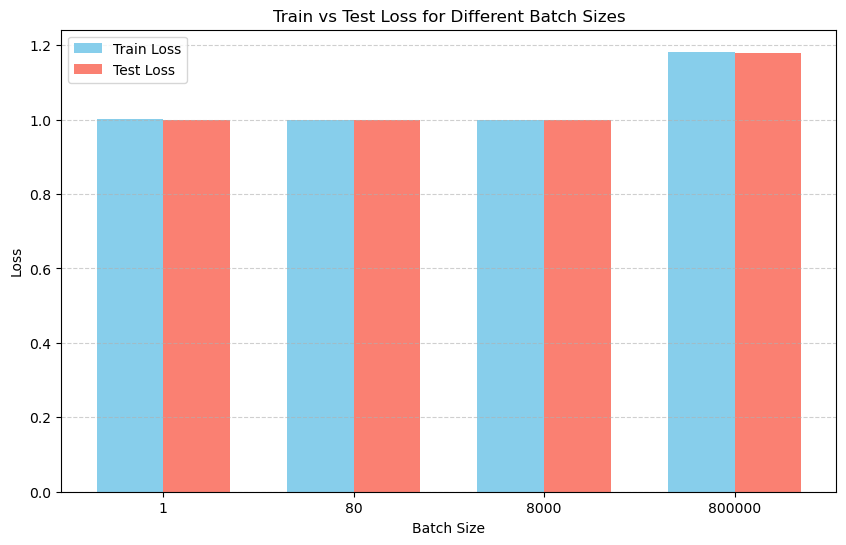

In [30]:
x = np.arange(len(batch_sizes))  # x locations
width = 0.35  # width of bars

plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_losses, width, label="Train Loss", color="skyblue")
plt.bar(x + width/2, test_losses, width, label="Test Loss", color="salmon")

# Labels and formatting
plt.xticks(x, [str(bs) for bs in batch_sizes])
plt.xlabel("Batch Size")
plt.ylabel("Loss")
plt.title("Train vs Test Loss for Different Batch Sizes")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

In [31]:
# so the training error and testing error are almost the same for all batch sizes
# and the one with batch size = 80 is merely close to the closed form loss

shape of theta_traj.shape:  (3, 55) for batch size :  1
shape of theta_traj.shape:  (3, 10) for batch size :  80
shape of theta_traj.shape:  (3, 119) for batch size :  8000
shape of theta_traj.shape:  (3, 3301) for batch size :  800000


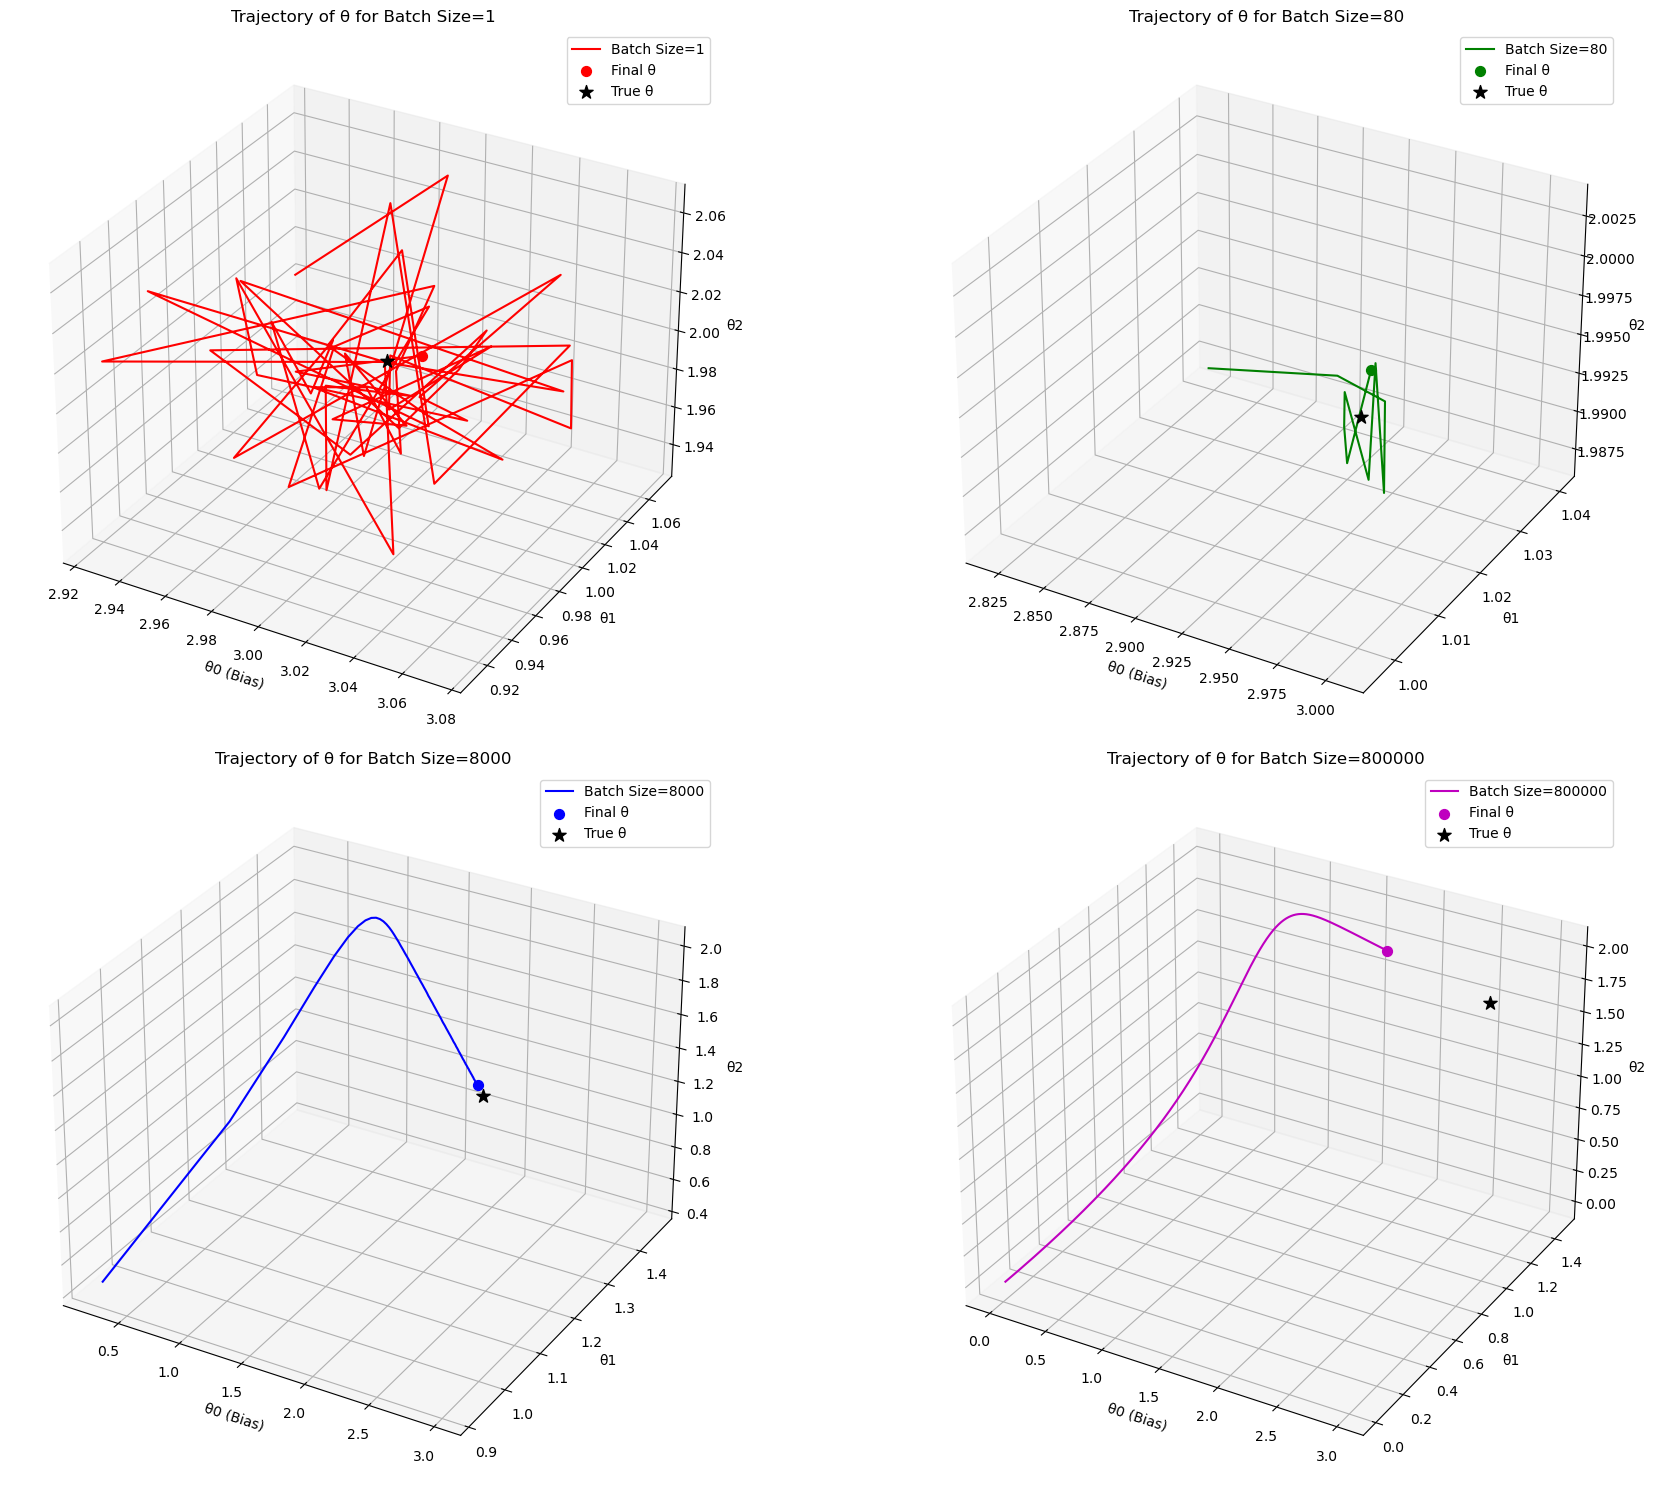

In [35]:
# Question 5
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

batchSizes = [1, 80, 8000, 800000]
colors = ['r', 'g', 'b', 'm']

fig = plt.figure(figsize=(20, 15))

for idx, batch in enumerate(batchSizes):
    ax = fig.add_subplot(2, 2, idx+1, projection='3d')
    
    # Convert thetaHistory list of arrays to numpy array: shape (3, num_epochs)
    theta_traj = np.hstack(params[batch]["thetaHistory"])  
    print("shape of theta_traj.shape: ",theta_traj.shape, "for batch size : ", batch)
    
    ax.plot(theta_traj[0,:], theta_traj[1,:], theta_traj[2,:], 
            label=f'Batch Size={batch}', color=colors[idx])
    
    # Final theta point
    ax.scatter(theta_traj[0,-1], theta_traj[1,-1], theta_traj[2,-1], 
               color=colors[idx], s=50, marker='o', label='Final θ')
    
    # True theta for reference
    theta_true = np.array([[3.0],[1.0],[2.0]])
    ax.scatter(theta_true[0], theta_true[1], theta_true[2], color='k', s=100, marker='*', label='True θ')
    
    ax.set_xlabel('θ0 (Bias)')
    ax.set_ylabel('θ1')
    ax.set_zlabel('θ2')
    ax.set_title(f'Trajectory of θ for Batch Size={batch}')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Batch size 1 (SGD): Very jagged trajectory, lots of bouncing, stochastic.
# Batch size 80 (mini-batch): Smoother, still some oscillations.
# Batch size 8000: Almost straight line toward optimum.
# Batch size 800000 (full-batch): Very smooth, direct path, takes many epochs to move.